In [2]:
#!/usr/bin/env python
# coding: utf-8

# Import Statements
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split # Functipn to split data into training, validation and test sets
from sklearn.metrics import classification_report, confusion_matrix
import pickle
import glob   # The glob module finds all the pathnames matching a specified pattern according to the rules used by the Unix shell, although results are returned in arbitrary order. No tilde expansion is done, but *, ?, and character ranges expressed with [] will be correctly matched.
import os   # miscellneous operating system interfaces. This module provides a portable way of using operating system dependent functionality. If you just want to read or write a file see open(), if you want to manipulate paths, see the os.path module, and if you want to read all the lines in all the files on the command line see the fileinput module.
import random       
from tqdm import tqdm 
from tqdm.notebook import tqdm_notebook
import datetime
import time
from tabulate import tabulate
import math 

import umap
import math


# Torch
import torch
from torchvision import transforms
import torchvision.models as models
import torch.nn as nn


from sklearn.preprocessing import StandardScaler, MultiLabelBinarizer
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier, BaggingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import PCA
from sklearn.metrics import precision_recall_curve,log_loss, accuracy_score, f1_score
from sklearn.metrics import average_precision_score,roc_auc_score
from sklearn.ensemble import VotingClassifier
import os
import time
from time import time
import datetime
import pandas as pd
import numpy as np
#from iterstrat.ml_stratifiers import MultilabelStratifiedKFold
from skmultilearn.adapt import MLkNN

# CMAP (extracting relevant transcriptomic profiles)
from cmapPy.pandasGEXpress.parse import parse
import cmapPy.pandasGEXpress.subset_gctoo as sg
import seaborn as sns
import matplotlib.pyplot as plt

from datetime import datetime
import time
import joblib

from sklearn.decomposition import PCA,FactorAnalysis
from sklearn.preprocessing import StandardScaler,QuantileTransformer
from sklearn.metrics import precision_recall_curve,log_loss
from sklearn.metrics import average_precision_score,roc_auc_score
from sklearn.feature_selection import VarianceThreshold
import os
import pandas as pd
import numpy as np
import torch
import pytorch_tabnet
from pytorch_tabnet.tab_model import TabNetClassifier
nn._estimator_type = "classifier"
import neptune.new as neptune


In [3]:
import sys
sys.path.append('/home/jovyan/Tomics-CP-Chem-MoA/05_Global_Tomics_CP_CStructure/')
from Erik_alll_helper_functions import pre_processing, create_splits, load_train_valid_data, dict_splitting_into_tensor

RDKit WARNING: [15:47:58] Enabling RDKit 2019.09.1 jupyter extensions


In [4]:
# clue row metadata with rows representing transcription levels of specific genes
clue_gene = pd.read_csv('/home/jovyan/Tomics-CP-Chem-MoA/04_Tomics_Models/init_data_expl/clue_geneinfo_beta.txt', delimiter = "\t")


# Erik10

In [5]:
# download csvs with all the data pre split
erik10_file = '/home/jovyan/Tomics-CP-Chem-MoA/data_for_models/5_fold_data_sets/erik10/'
train_filename = 'erik10_clue_train_fold_0.csv'
val_filename = 'erik10_clue_val_fold_0.csv'
test_filename = 'erik10_clue_test_fold_0.csv'

training_set, validation_set, test_set =  load_train_valid_data(erik10_file, train_filename, val_filename, test_filename)



L1000_training, L1000_validation, L1000_test = create_splits(training_set, validation_set, test_set)

variance_thresh = 0
normalize_c = False
df_train_features, df_val_features, df_train_labels, df_val_labels, df_test_features, df_test_labels, dict_moa = pre_processing(L1000_training, L1000_validation, L1000_test, 
         clue_gene, 
         npy_exists = True,
         use_variance_threshold = variance_thresh, 
         normalize = normalize_c, 
         save_npy = True)


pre-processing data!
extracting training transcriptomes
extracting validation transcriptomes
extracting test transcriptomes


In [6]:
df_train_features.labels


Index([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,
       ...
       968, 969, 970, 971, 972, 973, 974, 975, 976, 977],
      dtype='object', length=978)

Investigating using PCA


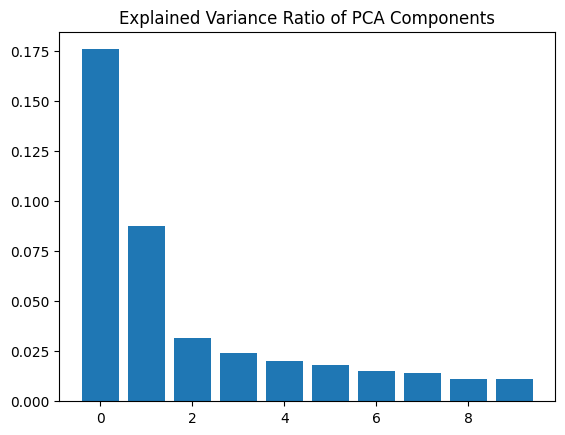

In [37]:
print("Investigating using PCA")
pca_ten = PCA(n_components=10)
pca_ten.fit_transform(df_train_features)
plt.figure()
plt.bar([i for i in range(0,10)], pca_ten.explained_variance_ratio_)
plt.title("Explained Variance Ratio of PCA Components")
plt.show() 

In [38]:
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(df_train_features)
principalDf = pd.DataFrame(data = principalComponents
             ,#  columns = [f' PC1: VarExp: {pca.explained_variance_[0]}', f' PC1: VarExp: {pca.explained_variance_[1]}'])
              columns = ["PC1" , "PC2"])


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or R

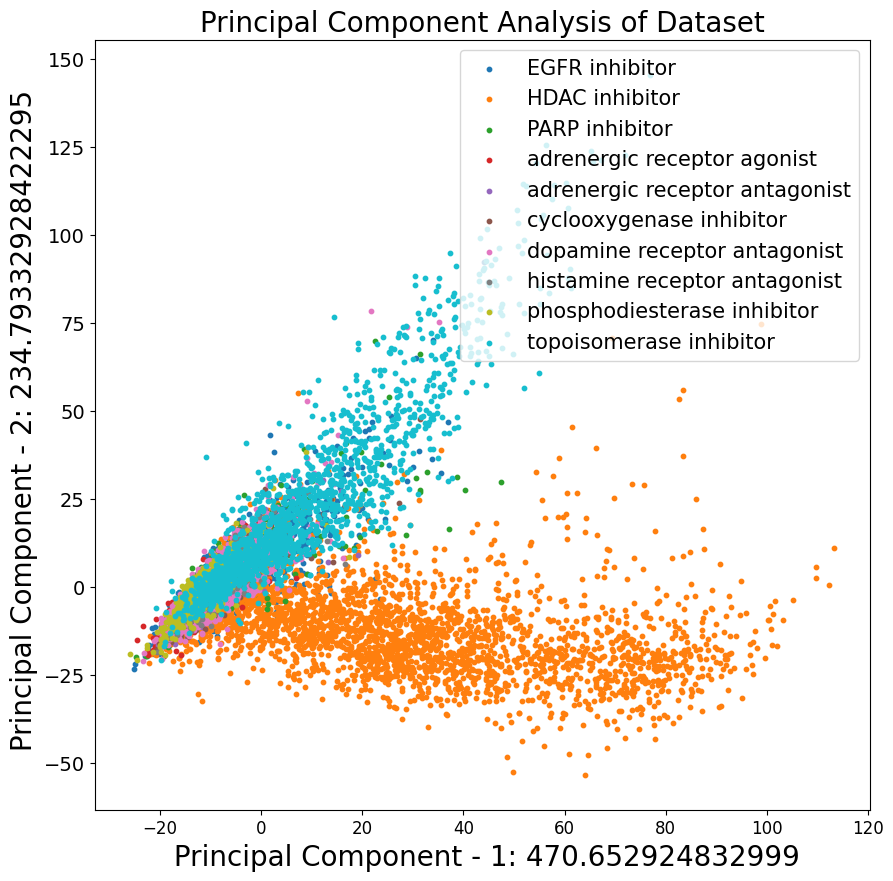

In [41]:

plt.figure(figsize=(10,10))
plt.xticks(fontsize=12)
plt.yticks(fontsize=14)
plt.xlabel(f' Principal Component - 1: {pca.explained_variance_[0]}', fontsize=20)
plt.ylabel(f' Principal Component - 2: {pca.explained_variance_[1]}', fontsize=20)
plt.title("Principal Component Analysis of Dataset", fontsize=20)
targets = [i for i in dict_moa.keys()]


colors = [sns.color_palette()[np.argmax(x)] for x in dict_moa.values()]
for target, color in zip(targets,colors):
    indicesToKeep = df_train_labels["moa"] == target
    plt.scatter(principalDf.loc[indicesToKeep, "PC1"], 
                principalDf.loc[indicesToKeep, 'PC2'],  
                c= color,
                s = 10)

plt.legend(targets,prop={'size': 15})
plt.show()


In [42]:

pca = PCA(n_components=20)
principalComponents = pca.fit_transform(df_train_features)
principalDf = pd.DataFrame(data = principalComponents)




In [43]:
print("Starting UMAP")
# In[127]:
umap_neighbors = 15
umap_min_dist = 0.1
reducer = umap.UMAP(n_neighbors= umap_neighbors, min_dist = umap_min_dist)

embedding = reducer.fit_transform(principalDf)



Starting UMAP


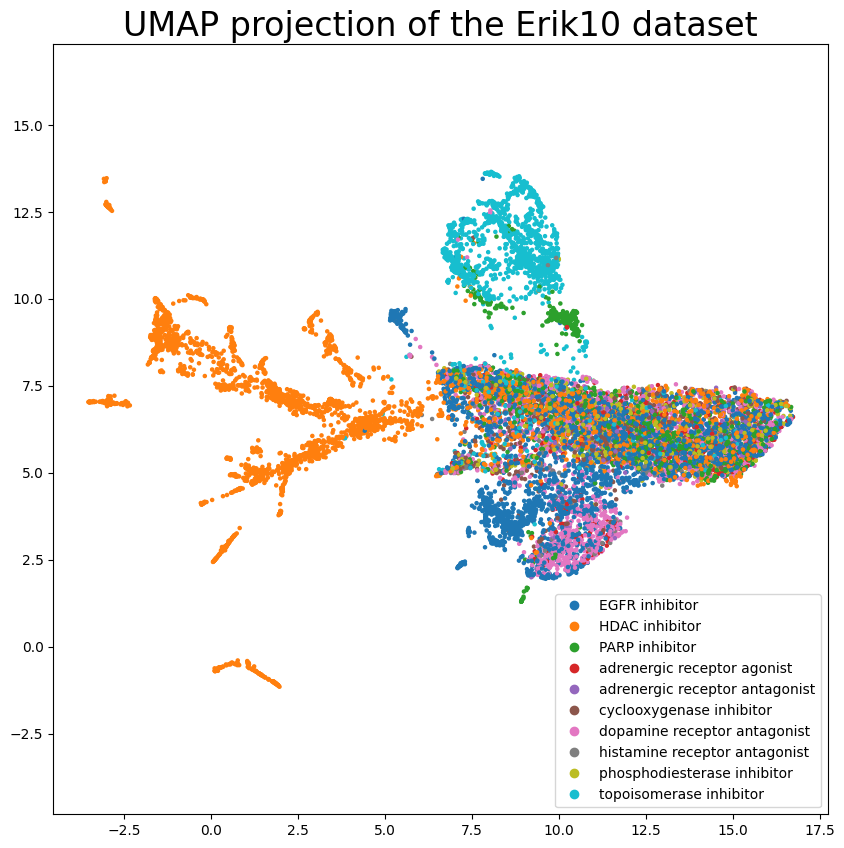

In [49]:
targets = [i for i in dict_moa.keys()]
labels_to_targets = {label: i for i, label in enumerate(targets)}
colors = [labels_to_targets[label] for label in df_train_labels.moa]
plt.figure(figsize=(10,10))
graph = plt.scatter(
    embedding[:, 0],
    embedding[:, 1],
    c=colors,
    cmap='tab10',
    s=5)
handles, labels= graph.legend_elements(prop="colors", num=len(targets))
plt.gca().set_aspect('equal', 'datalim')
plt.title('UMAP projection of the Erik10 dataset', fontsize=24);
plt.legend(handles, targets, prop={'size': 10})
plt.show()


In [50]:
# download csvs with all the data pre split
cyc_adr_file = '/home/jovyan/Tomics-CP-Chem-MoA/data_for_models/5_fold_data_sets/cyc_adr/'
train_filename = 'cyc_adr_clue_train_fold_0.csv'
val_filename = 'cyc_adr_clue_val_fold_0.csv'
test_filename = 'cyc_adr_clue_test_fold_0.csv'
training_set, validation_set, test_set =  load_train_valid_data(cyc_adr_file, train_filename, val_filename, test_filename)
   

L1000_training, L1000_validation, L1000_test = create_splits(training_set, validation_set, test_set)

variance_thresh = 0
normalize_c = False
df_train_features, df_val_features, df_train_labels, df_val_labels, df_test_features, df_test_labels, dict_moa = pre_processing(L1000_training, L1000_validation, L1000_test, 
         clue_gene, 
         npy_exists = False,
         use_variance_threshold = variance_thresh, 
         normalize = normalize_c, 
         save_npy = True)


pre-processing data!
extracting training transcriptomes
extracting validation transcriptomes
extracting test transcriptomes


# Cyc_ADR

Investigating using PCA


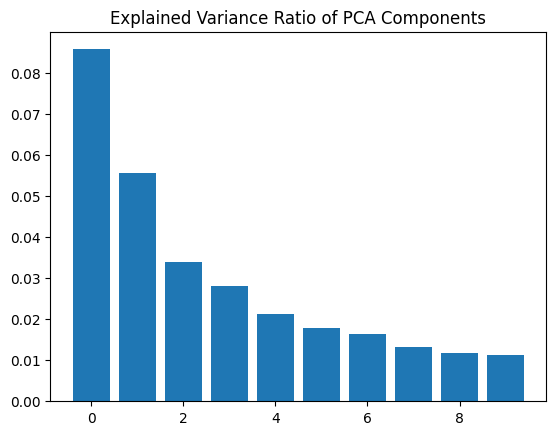

In [51]:
print("Investigating using PCA")
pca_ten = PCA(n_components=10)
pca_ten.fit_transform(df_train_features)
plt.figure()
plt.bar([i for i in range(0,10)], pca_ten.explained_variance_ratio_)
plt.title("Explained Variance Ratio of PCA Components")
plt.show() 

In [52]:
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(df_train_features)
principalDf = pd.DataFrame(data = principalComponents
             ,#  columns = [f' PC1: VarExp: {pca.explained_variance_[0]}', f' PC1: VarExp: {pca.explained_variance_[1]}'])
              columns = ["PC1" , "PC2"])


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


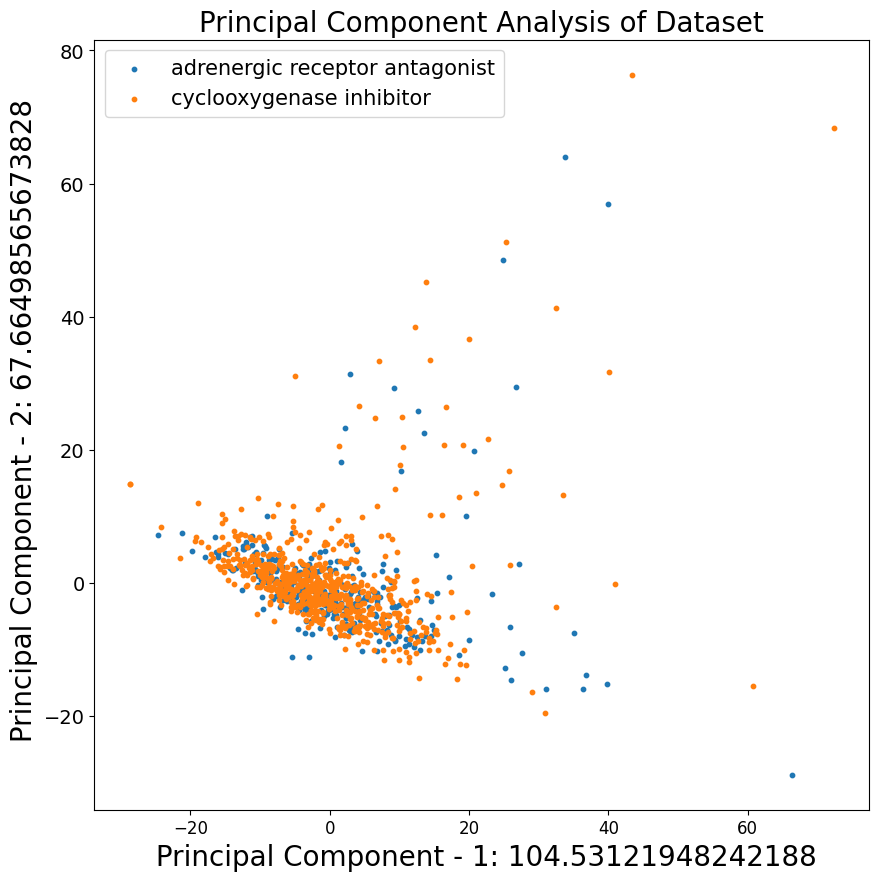

In [53]:

plt.figure(figsize=(10,10))
plt.xticks(fontsize=12)
plt.yticks(fontsize=14)
plt.xlabel(f' Principal Component - 1: {pca.explained_variance_[0]}', fontsize=20)
plt.ylabel(f' Principal Component - 2: {pca.explained_variance_[1]}', fontsize=20)
plt.title("Principal Component Analysis of Dataset", fontsize=20)
targets = [i for i in dict_moa.keys()]


colors = [sns.color_palette()[np.argmax(x)] for x in dict_moa.values()]
for target, color in zip(targets,colors):
    indicesToKeep = df_train_labels["moa"] == target
    plt.scatter(principalDf.loc[indicesToKeep, "PC1"], 
                principalDf.loc[indicesToKeep, 'PC2'],  
                c= color,
                s = 10)

plt.legend(targets,prop={'size': 15})
plt.show()


In [54]:

pca = PCA(n_components=20)
principalComponents = pca.fit_transform(df_train_features)
principalDf = pd.DataFrame(data = principalComponents)




In [55]:
print("Starting UMAP")
umap_neighbors = 15
umap_min_dist = 0.1
reducer = umap.UMAP(n_neighbors= umap_neighbors, min_dist = umap_min_dist)

embedding = reducer.fit_transform(principalDf)



Starting UMAP


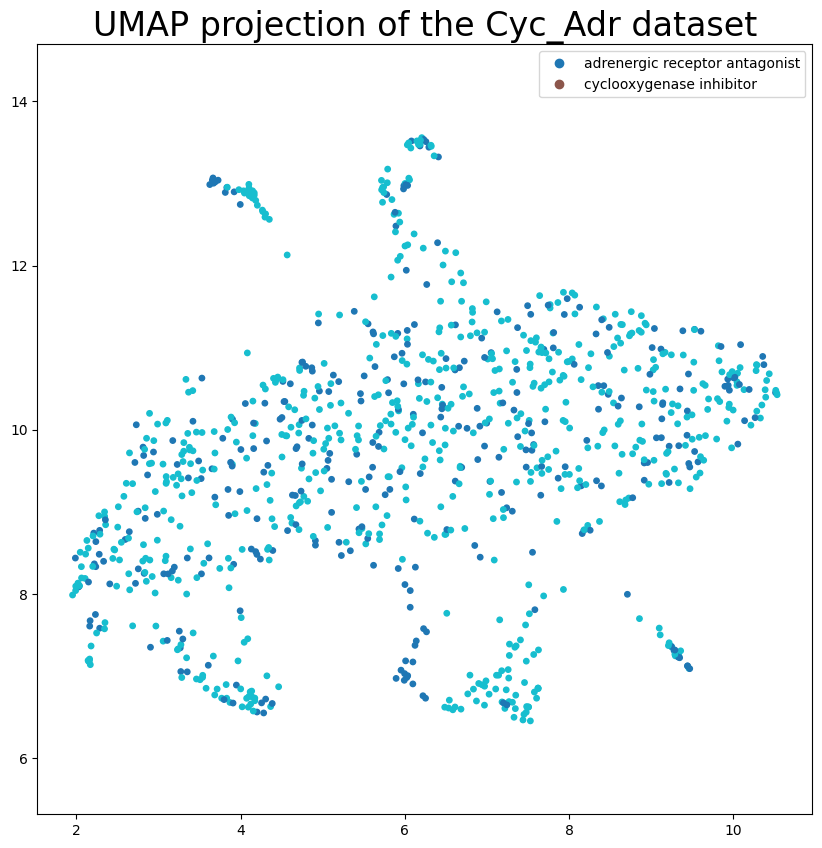

In [64]:
targets = [i for i in dict_moa.keys()]
labels_to_targets = {label: i for i, label in enumerate(targets)}
colors = [labels_to_targets[label] for label in df_train_labels.moa]
plt.figure(figsize=(10,10))
graph = plt.scatter(
    embedding[:, 0],
    embedding[:, 1],
    c=colors,
    cmap='tab10',
    s=15)
handles, labels= graph.legend_elements(prop="colors", num=len(targets))
plt.gca().set_aspect('equal', 'datalim')
plt.title('UMAP projection of the Cyc_Adr dataset', fontsize=24)
plt.legend(handles, targets, prop={'size': 10})
plt.show()

# Cyc_DOP

In [88]:
# download csvs with all the data pre split
cyc_dop_file = '/home/jovyan/Tomics-CP-Chem-MoA/data_for_models/5_fold_data_sets/cyc_dop/'
train_filename = 'cyc_dop_clue_train_fold_0.csv'
val_filename = 'cyc_dop_clue_val_fold_0.csv'
test_filename = 'cyc_dop_clue_test_fold_0.csv'
training_set, validation_set, test_set =  load_train_valid_data(cyc_dop_file, train_filename, val_filename, test_filename)
   

L1000_training, L1000_validation, L1000_test = create_splits(training_set, validation_set, test_set)

variance_thresh = 0
normalize_c = False
df_train_features, df_val_features, df_train_labels, df_val_labels, df_test_features, df_test_labels, dict_moa = pre_processing(L1000_training, L1000_validation, L1000_test, 
         clue_gene, 
         npy_exists = False,
         use_variance_threshold = variance_thresh, 
         normalize = normalize_c, 
         save_npy = True)

pre-processing data!
extracting training transcriptomes
extracting validation transcriptomes
extracting test transcriptomes


Investigating using PCA


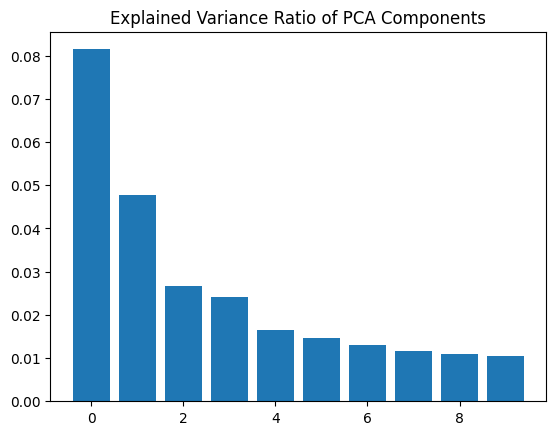

In [89]:
print("Investigating using PCA")
pca_ten = PCA(n_components=10)
pca_ten.fit_transform(df_train_features)
plt.figure()
plt.bar([i for i in range(0,10)], pca_ten.explained_variance_ratio_)
plt.title("Explained Variance Ratio of PCA Components")
plt.show() 

In [90]:
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(df_train_features)
principalDf = pd.DataFrame(data = principalComponents
             ,#  columns = [f' PC1: VarExp: {pca.explained_variance_[0]}', f' PC1: VarExp: {pca.explained_variance_[1]}'])
              columns = ["PC1" , "PC2"])


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


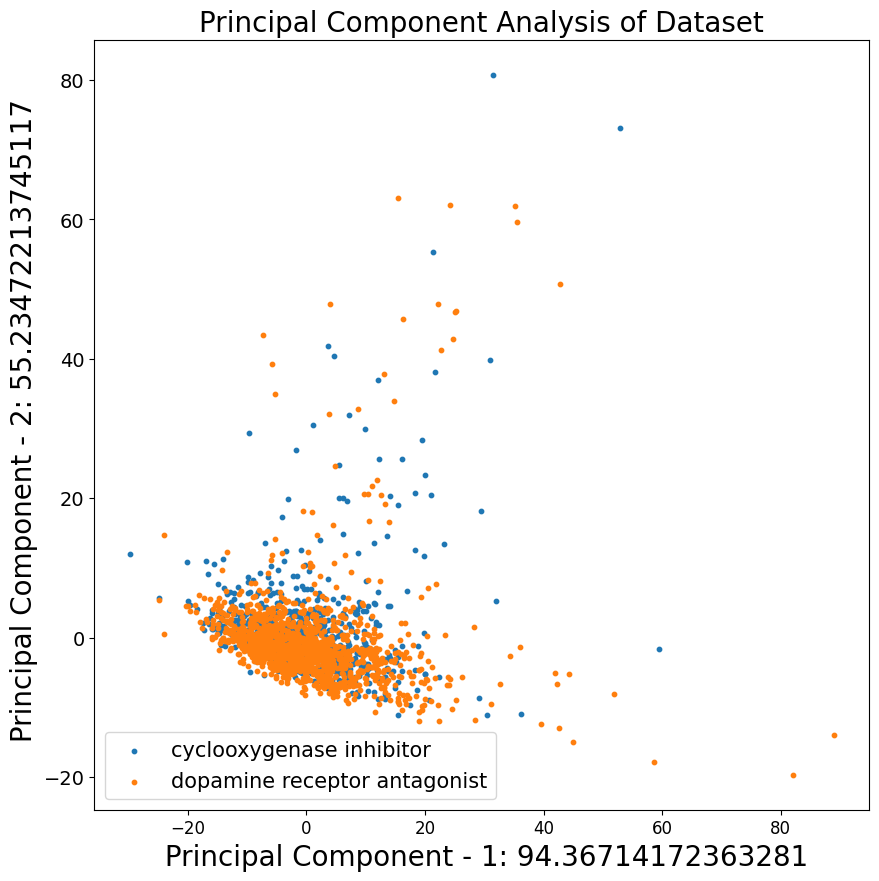

In [91]:

plt.figure(figsize=(10,10))
plt.xticks(fontsize=12)
plt.yticks(fontsize=14)
plt.xlabel(f' Principal Component - 1: {pca.explained_variance_[0]}', fontsize=20)
plt.ylabel(f' Principal Component - 2: {pca.explained_variance_[1]}', fontsize=20)
plt.title("Principal Component Analysis of Dataset", fontsize=20)
targets = [i for i in dict_moa.keys()]


colors = [sns.color_palette()[np.argmax(x)] for x in dict_moa.values()]
for target, color in zip(targets,colors):
    indicesToKeep = df_train_labels["moa"] == target
    plt.scatter(principalDf.loc[indicesToKeep, "PC1"], 
                principalDf.loc[indicesToKeep, 'PC2'],  
                c= color,
                s = 10)

plt.legend(targets,prop={'size': 15})
plt.show()


In [92]:

pca = PCA(n_components=20)
principalComponents = pca.fit_transform(df_train_features)
principalDf = pd.DataFrame(data = principalComponents)




In [93]:
print("Starting UMAP")
# In[127]:
umap_neighbors = 15
umap_min_dist = 0.1
reducer = umap.UMAP(n_neighbors= umap_neighbors, min_dist = umap_min_dist)

embedding = reducer.fit_transform(principalDf)



Starting UMAP


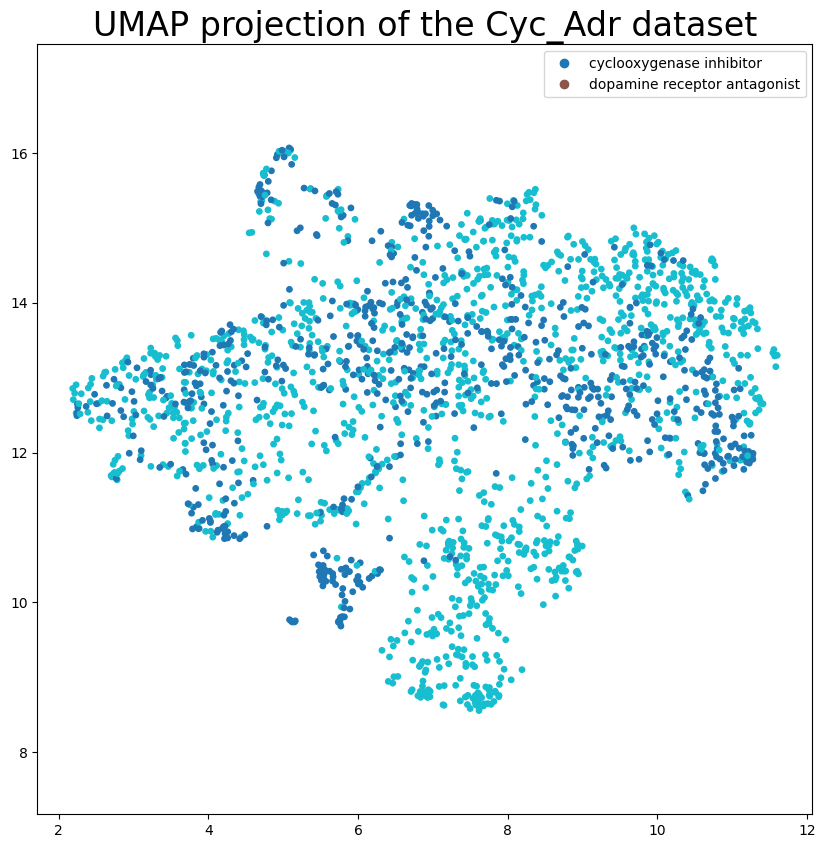

In [116]:
targets = [i for i in dict_moa.keys()]
labels_to_targets = {label: i for i, label in enumerate(targets)}
colors = [labels_to_targets[label] for label in df_train_labels.moa]
plt.figure(figsize=(10,10))
graph = plt.scatter(
    embedding[:, 0],
    embedding[:, 1],
    c=colors,
    cmap='tab10',
    s=15)
handles, labels= graph.legend_elements(prop="colors", num=len(targets))
plt.gca().set_aspect('equal', 'datalim')
plt.title('UMAP projection of the Cyc_Adr dataset', fontsize=24)
plt.legend(handles, targets, prop={'size': 10})
plt.show()

In [114]:
df_train_labels["moa"].unique()

array(['dopamine receptor antagonist', 'cyclooxygenase inhibitor'],
      dtype=object)

# Tian10

In [76]:
# download csvs with all the data pre split
tian10_file = '/home/jovyan/Tomics-CP-Chem-MoA/data_for_models/5_fold_data_sets/tian10/'
train_filename = 'tian10_clue_train_fold_0.csv'
val_filename = 'tian10_clue_val_fold_0.csv'
test_filename = 'tian10_clue_test_fold_0.csv'
training_set, validation_set, test_set =  load_train_valid_data(tian10_file, train_filename, val_filename, test_filename)
   

L1000_training, L1000_validation, L1000_test = create_splits(training_set, validation_set, test_set)

variance_thresh = 0
normalize_c = False
df_train_features, df_val_features, df_train_labels, df_val_labels, df_test_features, df_test_labels, dict_moa = pre_processing(L1000_training, L1000_validation, L1000_test, 
         clue_gene, 
         npy_exists = False,
         use_variance_threshold = variance_thresh, 
         normalize = normalize_c, 
         save_npy = True)

pre-processing data!
extracting training transcriptomes
extracting validation transcriptomes
extracting test transcriptomes


Investigating using PCA


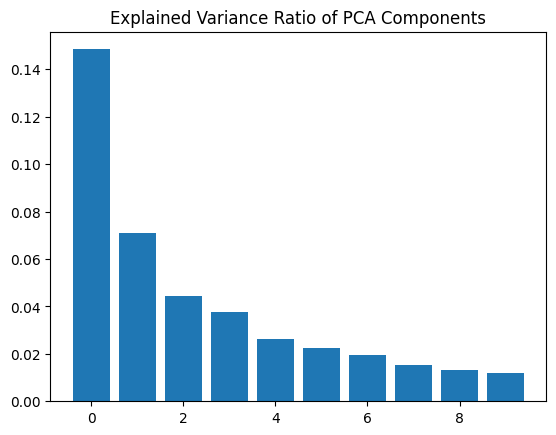

In [77]:
print("Investigating using PCA")
pca_ten = PCA(n_components=10)
pca_ten.fit_transform(df_train_features)
plt.figure()
plt.bar([i for i in range(0,10)], pca_ten.explained_variance_ratio_)
plt.title("Explained Variance Ratio of PCA Components")
plt.show() 
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(df_train_features)
principalDf = pd.DataFrame(data = principalComponents
             ,#  columns = [f' PC1: VarExp: {pca.explained_variance_[0]}', f' PC1: VarExp: {pca.explained_variance_[1]}'])
              columns = ["PC1" , "PC2"])


plt.figure(figsize=(10,10))
plt.xticks(fontsize=12)
plt.yticks(fontsize=14)
plt.xlabel(f' Principal Component - 1: {pca.explained_variance_[0]}', fontsize=20)
plt.ylabel(f' Principal Component - 2: {pca.explained_variance_[1]}', fontsize=20)
plt.title("Principal Component Analysis of Dataset", fontsize=20)
targets = [i for i in dict_moa.keys()]


colors = [sns.color_palette()[np.argmax(x)] for x in dict_moa.values()]
for target, color in zip(targets,colors):
    indicesToKeep = df_train_labels["moa"] == target
    plt.scatter(principalDf.loc[indicesToKeep, "PC1"], 
                principalDf.loc[indicesToKeep, 'PC2'],  
                c= color,
                s = 10)

plt.legend(targets,prop={'size': 15})
plt.show()


In [80]:
pca = PCA(n_components=20)
principalComponents = pca.fit_transform(df_train_features)
principalDf = pd.DataFrame(data = principalComponents)

print("Starting UMAP")
# In[127]:
umap_neighbors = 15
umap_min_dist = 0.1
reducer = umap.UMAP(n_neighbors= umap_neighbors, min_dist = umap_min_dist)

embedding = reducer.fit_transform(principalDf)



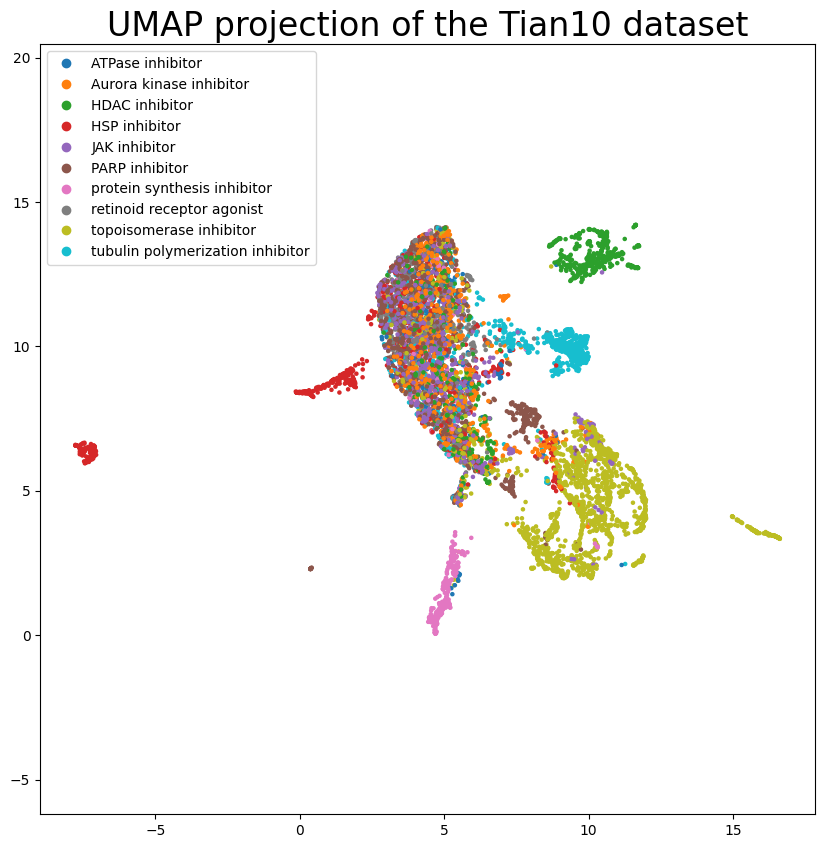

In [82]:
targets = [i for i in dict_moa.keys()]
labels_to_targets = {label: i for i, label in enumerate(targets)}
colors = [labels_to_targets[label] for label in df_train_labels.moa]
plt.figure(figsize=(10,10))
graph = plt.scatter(
    embedding[:, 0],
    embedding[:, 1],
    c=colors,
    cmap='tab10',
    s=5)
handles, labels= graph.legend_elements(prop="colors", num=len(targets))
plt.gca().set_aspect('equal', 'datalim')
plt.title('UMAP projection of the Tian10 dataset', fontsize=24);
plt.legend(handles, targets, prop={'size': 10})
plt.show()


# Compound Clustering

In [118]:
# download csvs with all the data pre split
erik10_file = '/home/jovyan/Tomics-CP-Chem-MoA/data_for_models/5_fold_data_sets/erik10/'
train_filename = 'erik10_clue_train_fold_0.csv'
val_filename = 'erik10_clue_val_fold_0.csv'
test_filename = 'erik10_clue_test_fold_0.csv'

training_set, validation_set, test_set =  load_train_valid_data(erik10_file, train_filename, val_filename, test_filename)



L1000_training, L1000_validation, L1000_test = create_splits(training_set, validation_set, test_set)

variance_thresh = 0
normalize_c = False
df_train_features, df_val_features, df_train_labels, df_val_labels, df_test_features, df_test_labels, dict_moa = pre_processing(L1000_training, L1000_validation, L1000_test, 
         clue_gene, 
         npy_exists = True,
         use_variance_threshold = variance_thresh, 
         normalize = normalize_c, 
         save_npy = False)


pre-processing data!
extracting training transcriptomes
extracting validation transcriptomes
extracting test transcriptomes


## Cyclooxygenase Inhibitor Compound Clustering

In [188]:
df_cyclo_labels = df_train_labels[df_train_labels["moa"] == "cyclooxygenase inhibitor"]

In [189]:
df_train_features_cyclo = df_train_features.iloc[df_cyclo_labels.index]


In [190]:
df_train_features_cyclo.reset_index(drop=True, inplace=True)
df_cyclo_labels.reset_index(drop=True, inplace=True)

In [191]:
df_cyclo_labels.head()

,Compound ID,moa
0,CBK011685,cyclooxygenase inhibitor
1,CBK011685,cyclooxygenase inhibitor
2,CBK011685,cyclooxygenase inhibitor
3,CBK011685,cyclooxygenase inhibitor
4,CBK011685,cyclooxygenase inhibitor


Investigating using PCA


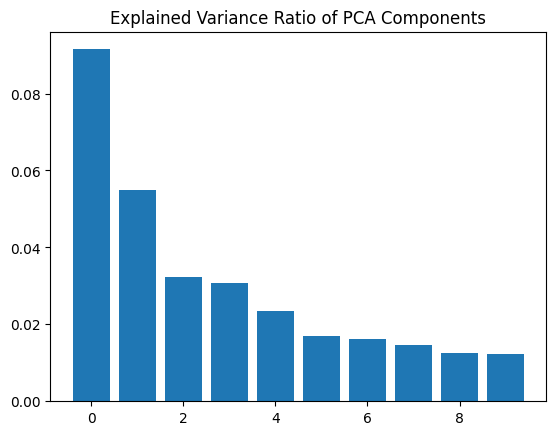

In [217]:
print("Investigating using PCA")
pca_ten = PCA(n_components=10)
pca_ten.fit_transform(df_train_features_cyclo)
plt.figure()
plt.bar([i for i in range(0,10)], pca_ten.explained_variance_ratio_)
plt.title("Explained Variance Ratio of PCA Components")
plt.show() 

In [218]:
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(df_train_features_cyclo)
principalDf = pd.DataFrame(data = principalComponents
             ,#  columns = [f' PC1: VarExp: {pca.explained_variance_[0]}', f' PC1: VarExp: {pca.explained_variance_[1]}'])
              columns = ["PC1" , "PC2"])


In [219]:

plt.figure(figsize=(10,10))
plt.xticks(fontsize=12)
plt.yticks(fontsize=14)
plt.xlabel(f' Principal Component - 1: {pca.explained_variance_[0]}', fontsize=20)
plt.ylabel(f' Principal Component - 2: {pca.explained_variance_[1]}', fontsize=20)
plt.title("Principal Component Analysis of Dataset", fontsize=20)
targets = [i for i in df_cyclo_labels["Compound ID"].unique()]
print(len(targets))

28


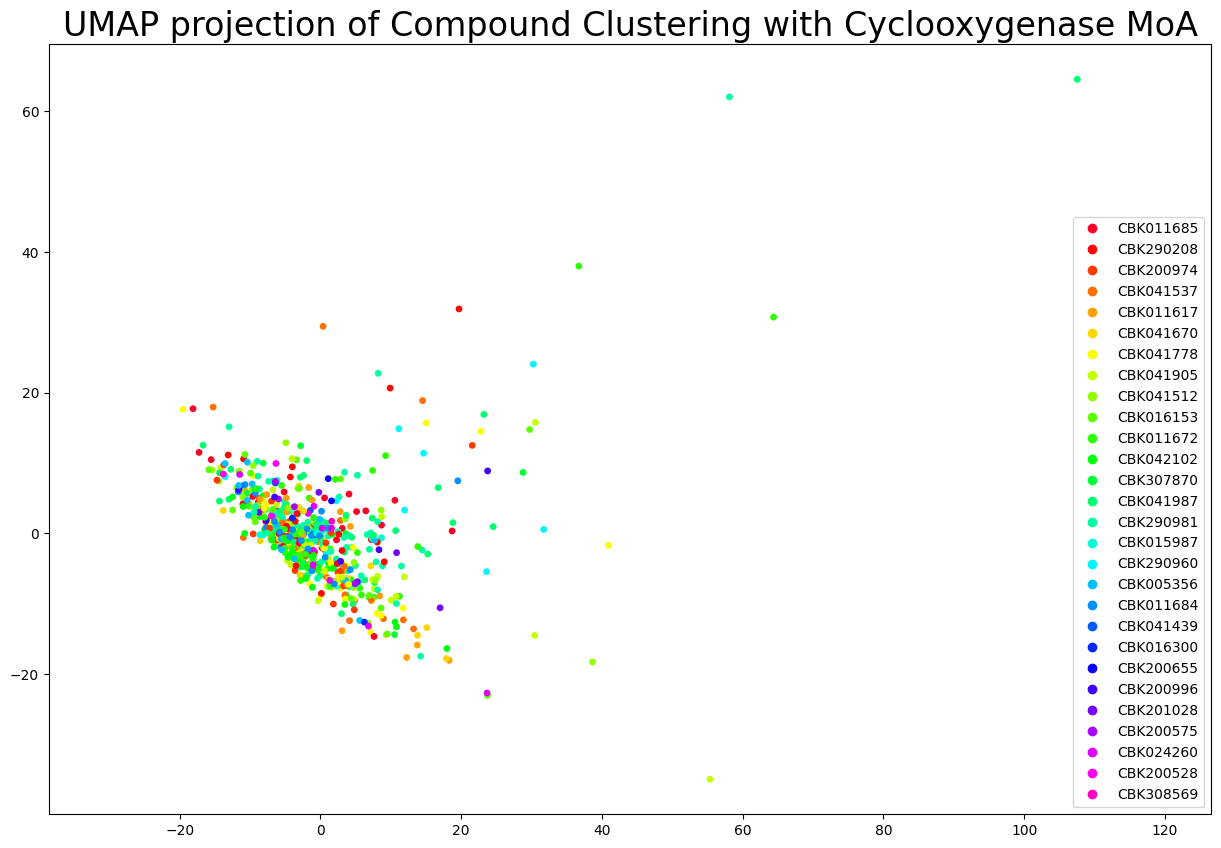

In [221]:
targets =  [i for i in df_cyclo_labels["Compound ID"].unique()]
labels_to_targets = {label: i for i, label in enumerate(targets)}
colors = [labels_to_targets[label] for label in df_cyclo_labels["Compound ID"]]
plt.figure(figsize=(15,10))
graph = plt.scatter(
    principalDf["PC1"],
    principalDf["PC2"],
    c=colors,
    cmap='gist_rainbow',
    s=15)

handles, labels= graph.legend_elements(prop="colors", num=len(targets))
plt.gca().set_aspect('equal', 'datalim')
plt.title('UMAP projection of Compound Clustering with Cyclooxygenase MoA', fontsize=24)
plt.legend(handles, targets, prop={'size': 10})
plt.show()


In [203]:

pca = PCA(n_components=20)
principalComponents = pca.fit_transform(df_train_features_cyclo)
principalDf = pd.DataFrame(data = principalComponents)




In [204]:
print("Starting UMAP")
# In[127]:
umap_neighbors = 15
umap_min_dist = 0.1
reducer = umap.UMAP(n_neighbors= umap_neighbors, min_dist = umap_min_dist)

embedding = reducer.fit_transform(principalDf)

Starting UMAP


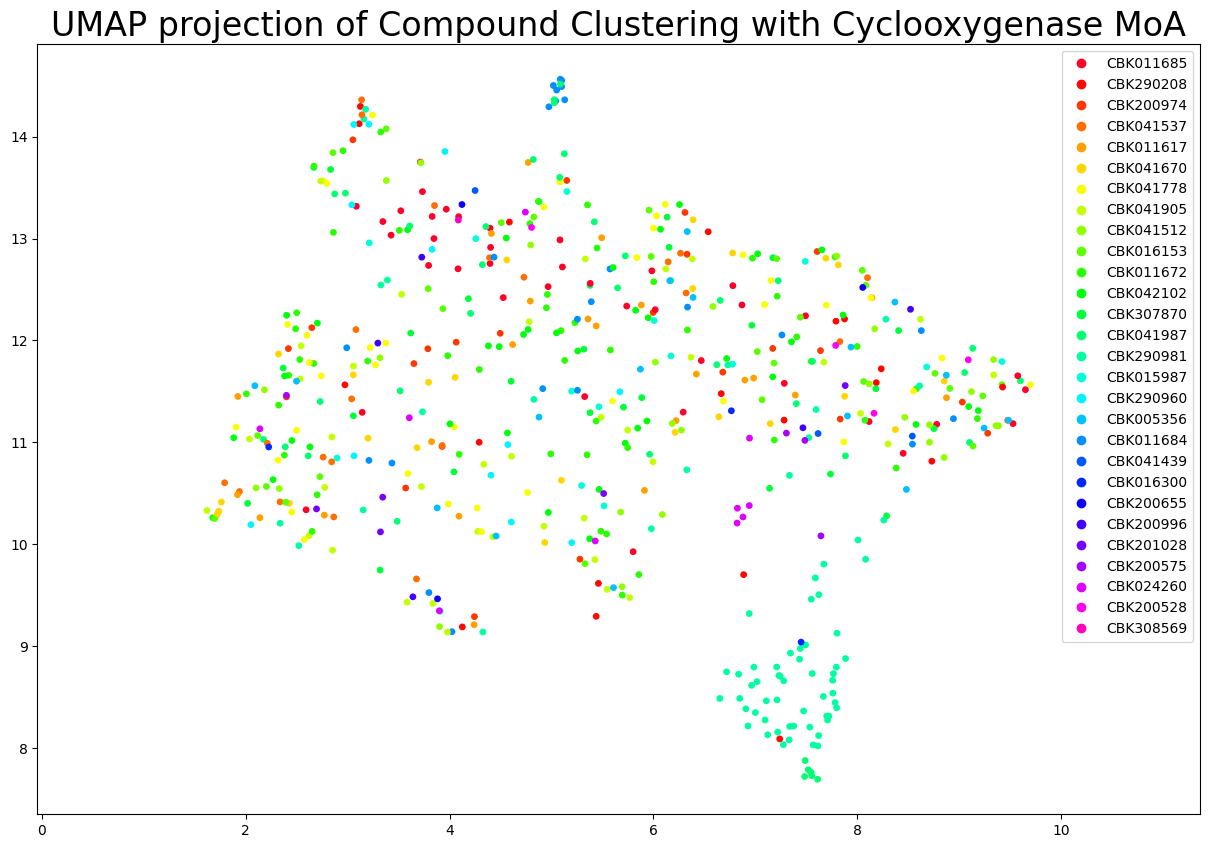

In [216]:
targets =  [i for i in df_cyclo_labels["Compound ID"].unique()]
labels_to_targets = {label: i for i, label in enumerate(targets)}
colors = [labels_to_targets[label] for label in df_cyclo_labels["Compound ID"]]
plt.figure(figsize=(15,10))
graph = plt.scatter(
    embedding[:, 0],
    embedding[:, 1],
    c=colors,
    cmap='gist_rainbow',
    s=15)
handles, labels= graph.legend_elements(prop="colors", num=len(targets))
plt.gca().set_aspect('equal', 'datalim')
plt.title('UMAP projection of Compound Clustering with Cyclooxygenase MoA', fontsize=24)
plt.legend(handles, targets, prop={'size': 10})
plt.show()


## Dopamine Receptor Antagonist Compound Clustering with UMAP

In [222]:
df_cyclo_labels = df_train_labels[df_train_labels["moa"] == "dopamine receptor antagonist"]

In [223]:
df_train_features_cyclo = df_train_features.iloc[df_cyclo_labels.index]

In [224]:
df_train_features_cyclo.reset_index(drop=True, inplace=True)
df_cyclo_labels.reset_index(drop=True, inplace=True)

In [225]:
df_cyclo_labels.head()

,Compound ID,moa
0,CBK023992,dopamine receptor antagonist
1,CBK041403,dopamine receptor antagonist
2,CBK023992,dopamine receptor antagonist
3,CBK041403,dopamine receptor antagonist
4,CBK023992,dopamine receptor antagonist


Investigating using PCA


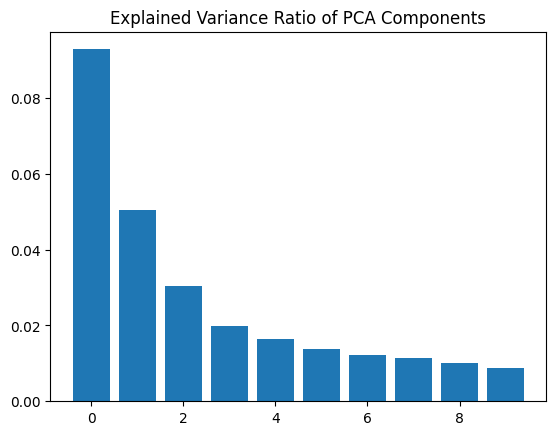

In [226]:
print("Investigating using PCA")
pca_ten = PCA(n_components=10)
pca_ten.fit_transform(df_train_features_cyclo)
plt.figure()
plt.bar([i for i in range(0,10)], pca_ten.explained_variance_ratio_)
plt.title("Explained Variance Ratio of PCA Components")
plt.show() 

In [227]:
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(df_train_features_cyclo)
principalDf = pd.DataFrame(data = principalComponents
             ,#  columns = [f' PC1: VarExp: {pca.explained_variance_[0]}', f' PC1: VarExp: {pca.explained_variance_[1]}'])
              columns = ["PC1" , "PC2"])


In [228]:

plt.figure(figsize=(10,10))
plt.xticks(fontsize=12)
plt.yticks(fontsize=14)
plt.xlabel(f' Principal Component - 1: {pca.explained_variance_[0]}', fontsize=20)
plt.ylabel(f' Principal Component - 2: {pca.explained_variance_[1]}', fontsize=20)
plt.title("Principal Component Analysis of Dataset", fontsize=20)
targets = [i for i in df_cyclo_labels["Compound ID"].unique()]
print(len(targets))

16


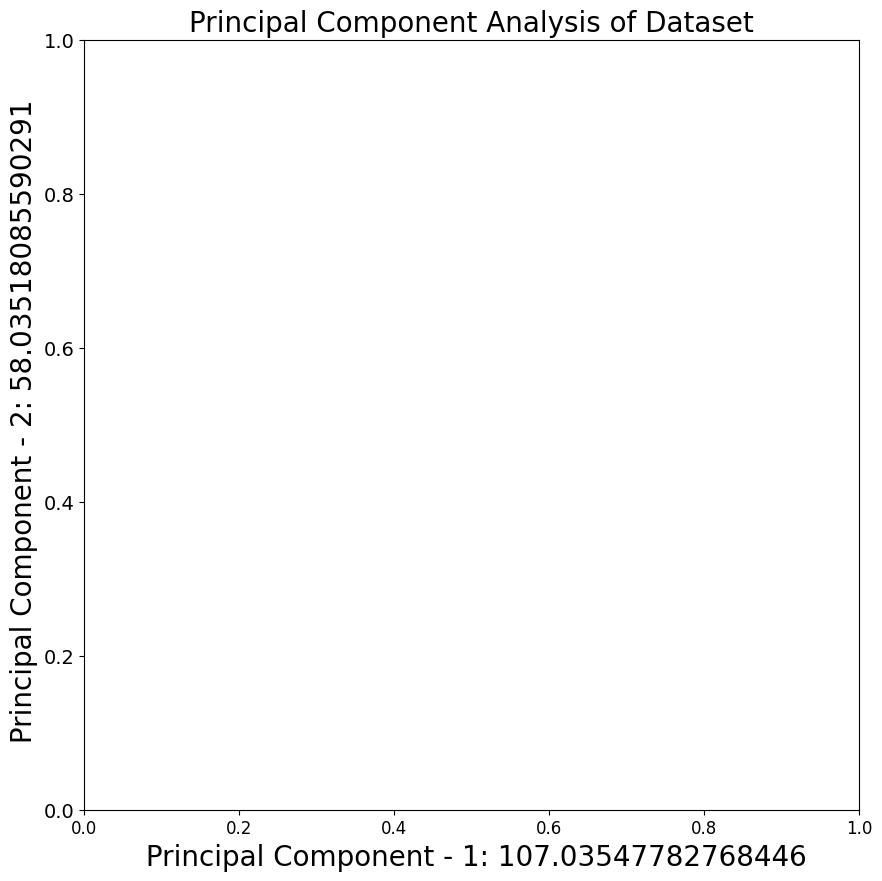

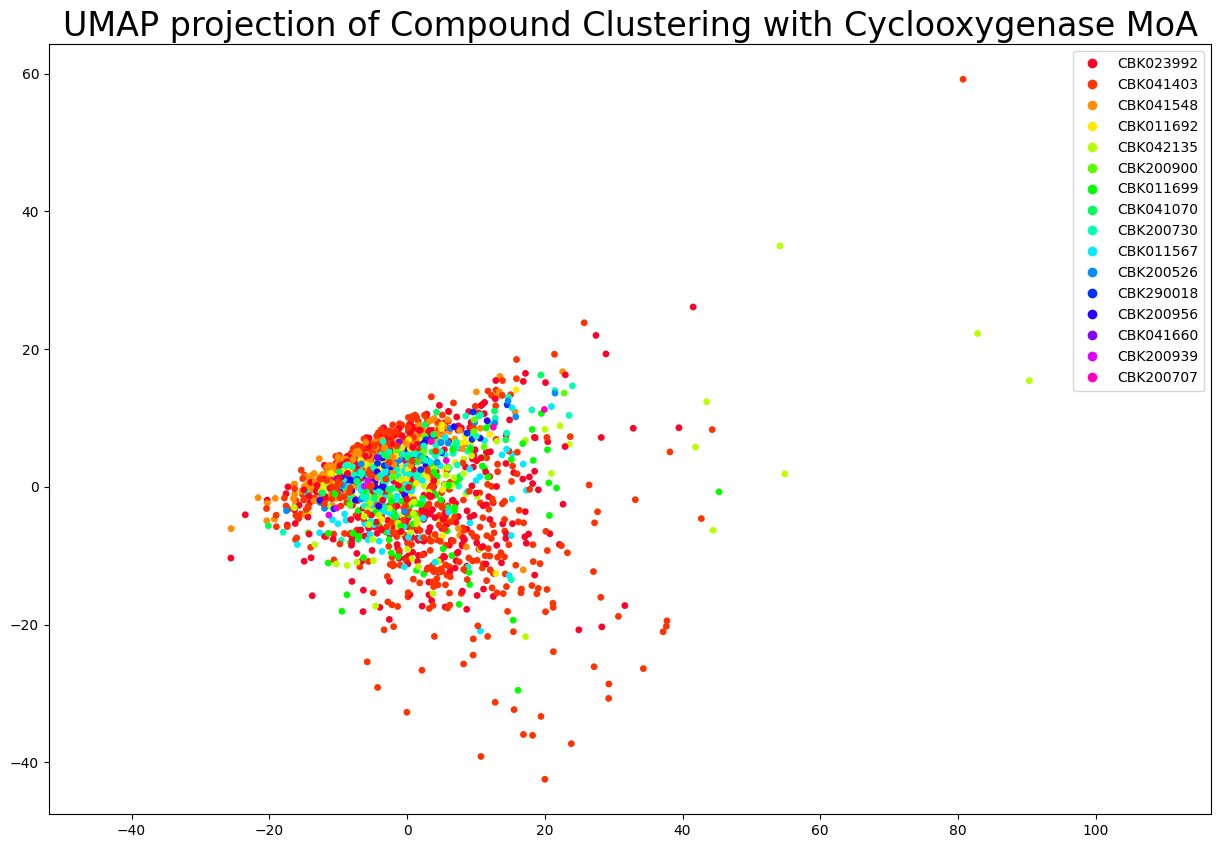

In [229]:
targets =  [i for i in df_cyclo_labels["Compound ID"].unique()]
labels_to_targets = {label: i for i, label in enumerate(targets)}
colors = [labels_to_targets[label] for label in df_cyclo_labels["Compound ID"]]
plt.figure(figsize=(15,10))
graph = plt.scatter(
    principalDf["PC1"],
    principalDf["PC2"],
    c=colors,
    cmap='gist_rainbow',
    s=15)

handles, labels= graph.legend_elements(prop="colors", num=len(targets))
plt.gca().set_aspect('equal', 'datalim')
plt.title('UMAP projection of Compound Clustering with Cyclooxygenase MoA', fontsize=24)
plt.legend(handles, targets, prop={'size': 10})
plt.show()


In [230]:

pca = PCA(n_components=20)
principalComponents = pca.fit_transform(df_train_features_cyclo)
principalDf = pd.DataFrame(data = principalComponents)




In [231]:
print("Starting UMAP")
# In[127]:
umap_neighbors = 15
umap_min_dist = 0.1
reducer = umap.UMAP(n_neighbors= umap_neighbors, min_dist = umap_min_dist)

embedding = reducer.fit_transform(principalDf)

Starting UMAP


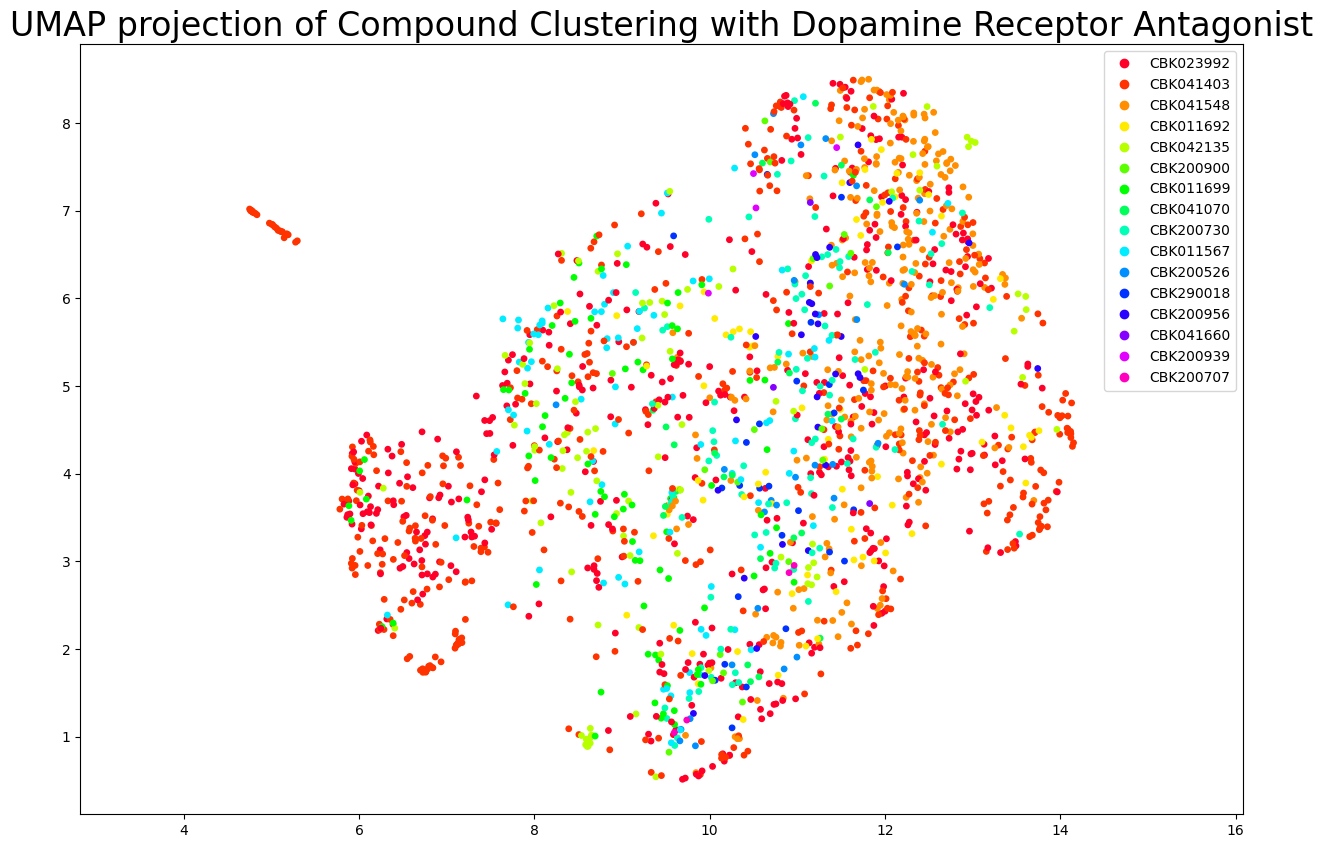

In [233]:
targets =  [i for i in df_cyclo_labels["Compound ID"].unique()]
labels_to_targets = {label: i for i, label in enumerate(targets)}
colors = [labels_to_targets[label] for label in df_cyclo_labels["Compound ID"]]
plt.figure(figsize=(15,10))
graph = plt.scatter(
    embedding[:, 0],
    embedding[:, 1],
    c=colors,
    cmap='gist_rainbow',
    s=15)
handles, labels= graph.legend_elements(prop="colors", num=len(targets))
plt.gca().set_aspect('equal', 'datalim')
plt.title('UMAP projection of Compound Clustering with Dopamine Receptor Antagonist', fontsize=24)
plt.legend(handles, targets, prop={'size': 10})
plt.show()
